[{6.0: 6.0, 7.0: 7.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0, 1.0: 1.0}, {6.0: 0.2233829227826901, 7.0: 0.22654324200045, 2.0: 0.2603281245781246, 3.0: 0.2381474267583712, 4.0: 0.2417646605141853, 5.0: 0.2298862604450031}, {6.0: 5.053125, 7.0: 4.606180555555556, 2.0: 4.5, 3.0: 3.991666666666667, 4.0: 5.19375, 5.0: 4.96375}, {2.0: 2.4, 1.0: 3.025}, {2.0: 1.9833333333333332, 3.0: 1.7833333333333334, 1.0: 2.275}, {2.0: 2.410416666666667, 3.0: 2.125, 4.0: 1.875, 1.0: 2.6729166666666666}, {2.0: 2.24375, 3.0: 1.975833333333333, 4.0: 1.63, 5.0: 1.44875, 1.0: 2.3554166666666667}, {6.0: 1.4949305555555557, 2.0: 2.2136805555555554, 3.0: 2.03875, 4.0: 1.7154166666666666, 5.0: 1.5996527777777778, 1.0: 2.373333333333333}, {6.0: 1.118075396825397, 7.0: 1.0499404761904765, 2.0: 1.8622023809523809, 3.0: 1.7280257936507937, 4.0: 1.3665575396825398, 5.0: 1.225843253968254, 1.0: 1.983501984126984}]


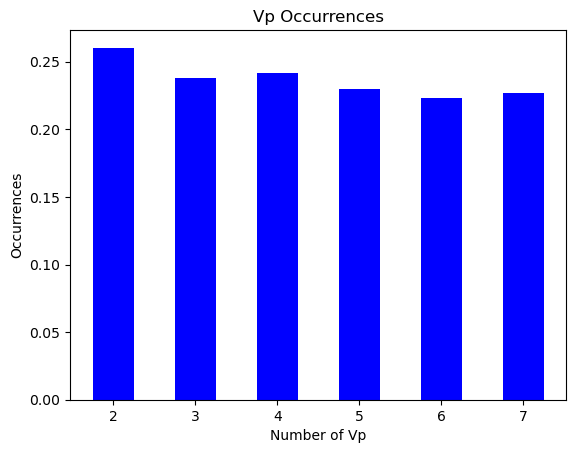

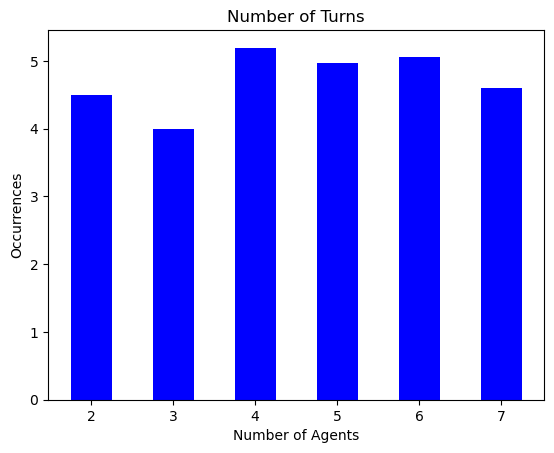

<Figure size 640x480 with 0 Axes>

In [4]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
def est(s):
    try:
        int(s)
        return True
    except ValueError:
        return False
def create_csv_link(dossier):
    # Vérifier si le chemin spécifié est un dossier
    if not os.path.isdir(dossier):
        return "Le chemin spécifié n'est pas un dossier."

    # Initialiser le compteur de fichiers
    nombre_fichiers = 0
    liste_of_df=[]
    # Parcourir tous les éléments du dossier
    for element in os.listdir(dossier):
        chemin_element = os.path.join(dossier, element)
        # Vérifier si l'élément est un fichier
        
        df=pd.read_csv(chemin_element)
        liste_of_df.append(df)

    return liste_of_df

liste_of_df=create_csv_link("csv/csv_UG")

def sommeCSV(liste_of_df):
    lister=[]
    m=0
    for df in liste_of_df :
        
        if(m==0):
            for collone in df :
                lister.append([list(df[collone]),1])
                m=1
                
        else :
            col=0
            for collone in df :
                
                for j in range (len(list(df[collone]))) :
                    
                    if (not np.isnan(df[collone][j])) and lister[col][0][j]!=" nan":
                        lister[col][0][j]=float(lister[col][0][j])+float(df[collone][j])
                              
                lister[col][1]=float(lister[col][1])+1
                col=col+1
   
    new_lister=[]
    
    for i in range(len(lister)):
        semi_list={}
        for j in range(len(lister[i][0])):
            if(est(lister[i][0][j])):
                
                semi_list[float(lister[0][0][j])/lister[0][1]]=(float(lister[i][0][j])/float(lister[i][1]))
        new_lister.append(semi_list)
    
    return new_lister

def affichage_graph_vp(donnees):
    
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5)) 
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Vp Occurrences')
    plt.xlabel('Number of Vp')
    plt.ylabel('Occurrences')
    plt.xticks(vp)
    plt.show()
    plt.clf()
    
def affichage_graph_turn(donnees):
    
    vp = list(donnees.keys())
    occurrences = list(donnees.values())
    largeur_barre = max(0.5, min(0.15 * len(vp), 0.5)) 
    # Créer le graphique à barres
    plt.bar(vp, occurrences, color='blue',width=largeur_barre)

    # Ajouter des titres et des libellés
    plt.title('Number of Turns')
    plt.xlabel('Number of Agents')
    plt.ylabel('Occurrences')
    plt.xticks(vp)
    plt.show()
    plt.clf()
    
print(sommeCSV(liste_of_df))
affichage_graph_vp(sommeCSV(liste_of_df)[1])
affichage_graph_turn(sommeCSV(liste_of_df)[2])

0.2233829227826901
0.22654324200045
0.2603281245781246
0.2381474267583712
0.2417646605141853
0.2298862604450031
0


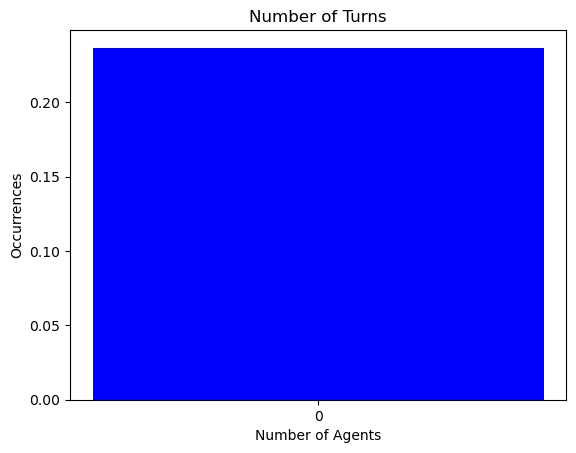

<Figure size 640x480 with 0 Axes>

In [5]:
liste_of_df=create_csv_link("csv/csv_UG")

def mean_global(list_of_df):
    dic={}
    l=0
        
    for df in list_of_df:
        
        somme=0
        for j in df["vp"]:
            if(not np.isnan(j)):
                print(j)
                somme=somme+float(j)
        dic[l]=somme/6
        print(l)
        l=l+1
    return dic 

affichage_graph_turn(mean_global(liste_of_df))


In [6]:
def plot_agents_bar_chart(data):
    # Création d'un dictionnaire pour stocker le nombre d'agents par nombre de coups et valeur boolean
    agent_counts = {}

    for item in data:
        # Récupération du nombre de coups et de la valeur boolean
        coup = int(item[1].strip())
        boolean = item[0]

        # Mise à jour du dictionnaire
        if coup not in agent_counts:
            agent_counts[coup] = {'True': 0, 'False': 0}
        agent_counts[coup][boolean] += 1

    # Préparation des données pour le graphique
    coups = sorted(agent_counts.keys())
    true_counts = [agent_counts[coup]['True'] for coup in coups]
    false_counts = [agent_counts[coup]['False'] for coup in coups]

    # Création du diagramme en barres
    width = 0.35  # Largeur des barres
    fig, ax = plt.subplots()
    ind = np.arange(len(coups))  # Emplacement des barres

    p1 = ax.bar(ind, true_counts, width, color='green', label='True')
    p2 = ax.bar(ind, false_counts, width, color='red', bottom=true_counts, label='False')

    ax.set_xlabel('Number of Args Played')
    ax.set_ylabel("Number of Agents")
    ax.set_title('Number of Agents by Number of Arg Played and Boolean Value')
    ax.set_xticks(ind)
    ax.set_xticklabels(coups)
    ax.legend()

    plt.show()


# Chemin vers le fichier texte où sont enregistrées les données
file_path = "csv/csv_UG_point"

def file_transform(file_path):
    # Lecture des données depuis le fichier texte et stockage dans une liste
   
    liste_of_data=[]
    # Parcourir tous les éléments du dossier
    for element in os.listdir(file_path):
        with open(file_path+"/"+element, "r") as file:
            lines = file.readlines()
        retrieved_data = [line.strip().split() for line in lines]
        for i in retrieved_data :
            liste_of_data.append(i)
            
    return liste_of_data
            
    


data=file_transform(file_path)
print(data)
cleaned_data = [[d[0].strip(), d[1].strip(), d[2].strip()] for d in data]

# Séparer les données en deux listes : une pour les valeurs "True" et une pour les valeurs "False"
true_values = [(int(d[1]), int(d[2])) for d in cleaned_data if d[0] == 'True']
false_values = [(int(d[1]), int(d[2])) for d in cleaned_data if d[0] == 'False']

# Vérifier si les listes sont vides
if true_values:
    true_x, true_y = zip(*true_values)
else:
    true_x, true_y = [], []

if false_values:
    false_x, false_y = zip(*false_values)
else:
    false_x, false_y = [], []

# Créer le graphique
plt.scatter(true_x, true_y, color='green', label='True')
plt.scatter(false_x, false_y, color='red', label='False')

# Ajouter une légende
plt.legend()

# Ajouter des étiquettes
plt.xlabel('Number of Moves Played')
plt.ylabel('Number of Moves Available')

# Afficher le graphique
plt.title('Relationship between Number of Moves Played and Number of Moves Available')
plt.show()

plot_agents_bar_chart(data)



FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'csv/csv_UG_point'

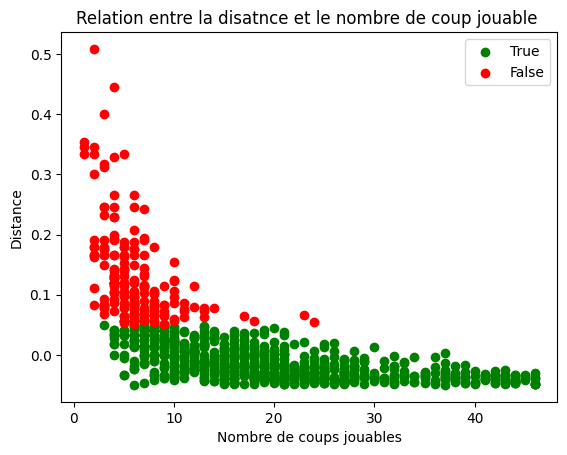

In [ ]:
# Nettoyer les espaces dans les données et convertir les valeurs en entiers
cleaned_data = [[d[0].strip(), d[2].strip(), d[3].strip().split("]")[0]] for d in data]

# Séparer les données en deux listes : une pour les valeurs "True" et une pour les valeurs "False"
true_values = [(int(d[1]), float(d[2])) for d in cleaned_data if d[0] == 'True']
false_values = [(int(d[1]), float(d[2])) for d in cleaned_data if d[0] == 'False']

# Vérifier si les listes sont vides
if true_values:
    true_x, true_y = zip(*true_values)
else:
    true_x, true_y = [], []

if false_values:
    false_x, false_y = zip(*false_values)
else:
    false_x, false_y = [], []

# Créer le graphique
plt.scatter(true_x, true_y, color='green', label='True')
plt.scatter(false_x, false_y, color='red', label='False')

# Ajouter une légende
plt.legend()

# Ajouter des étiquettes
plt.ylabel('Number of Moves Available')
plt.ylabel('Distance')

# Afficher le graphique
plt.title('Relationship between Distance and Number of Moves Available')
plt.show()


[{6.0: 6.0, 7.0: 7.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0, 1.0: 1.0}, {6.0: 0.15367490488719227, 7.0: 0.15124891662513984, 2.0: 0.16210497168735144, 3.0: 0.16114093873962285, 4.0: 0.1561975250626565, 5.0: 0.152347325192083}, {6.0: 4.200555555555557, 7.0: 4.381571869488537, 2.0: 5.0125, 3.0: 3.966666666666667, 4.0: 4.340624999999999, 5.0: 4.369583333333333}, {2.0: 2.925, 1.0: 3.45}, {2.0: 2.15, 3.0: 1.75, 1.0: 2.5}, {2.0: 2.122916666666667, 3.0: 1.9312500000000001, 4.0: 1.5864583333333333, 1.0: 2.3041666666666663}, {2.0: 2.0481249999999998, 3.0: 1.8312499999999998, 4.0: 1.5545833333333334, 5.0: 1.3675, 1.0: 2.2041666666666666}, {6.0: 1.0883333333333334, 2.0: 1.8267361111111111, 3.0: 1.6678472222222223, 4.0: 1.4824652777777776, 5.0: 1.2971875, 1.0: 1.9478124999999997}, {6.0: 1.119610339506173, 7.0: 0.9754701278659612, 2.0: 1.816432429453263, 3.0: 1.6739561287477955, 4.0: 1.4762163800705468, 5.0: 1.282814704585538, 1.0: 1.8895480599647265}]


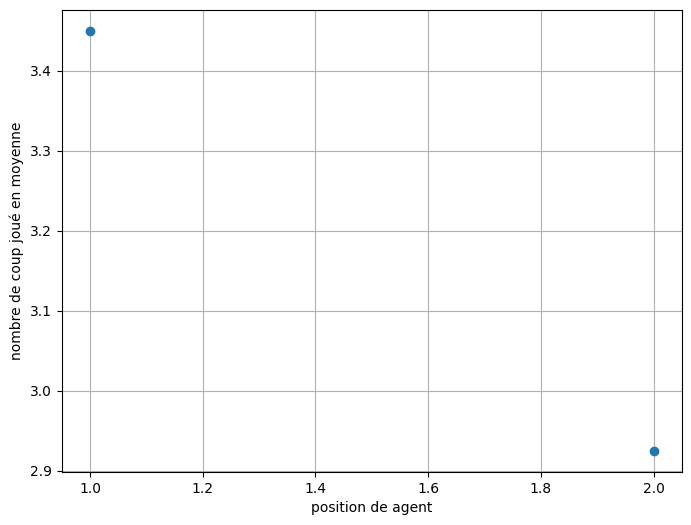

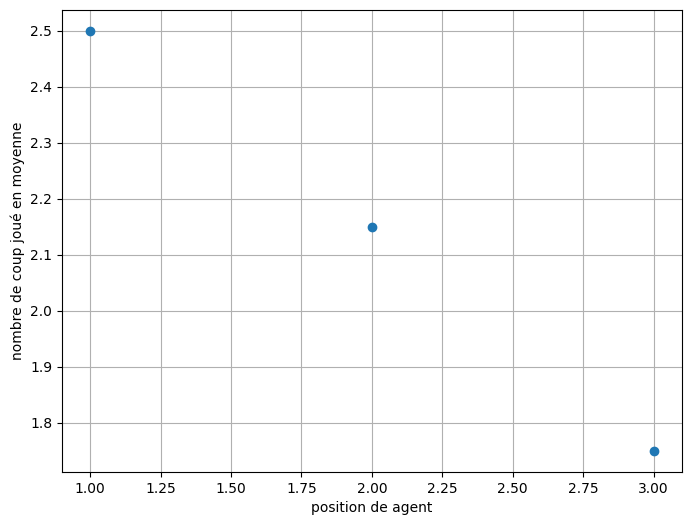

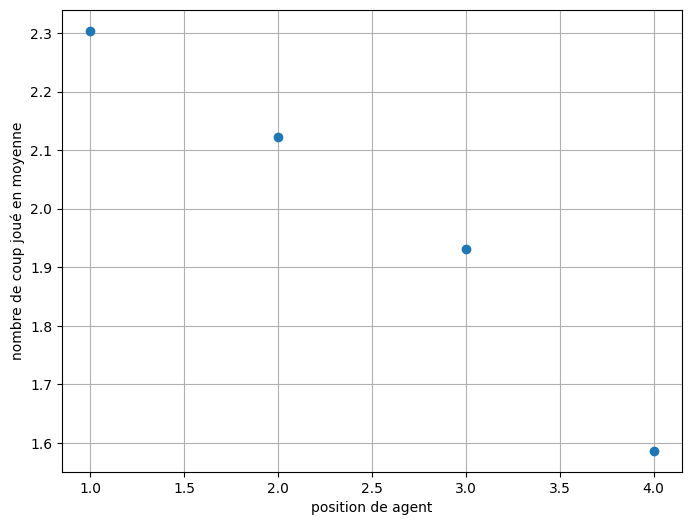

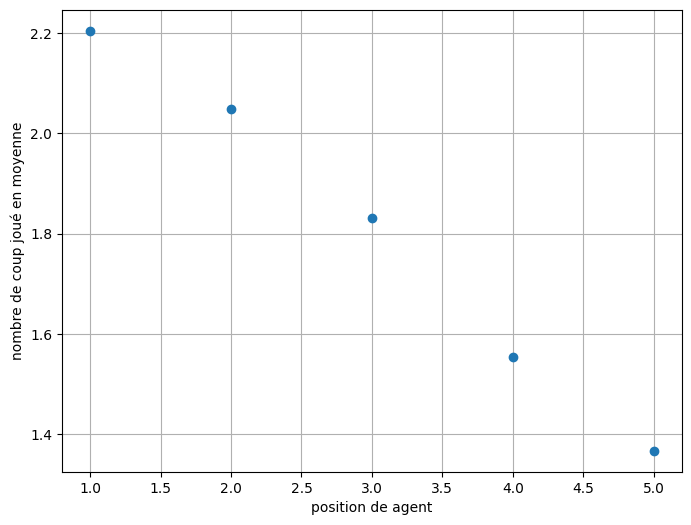

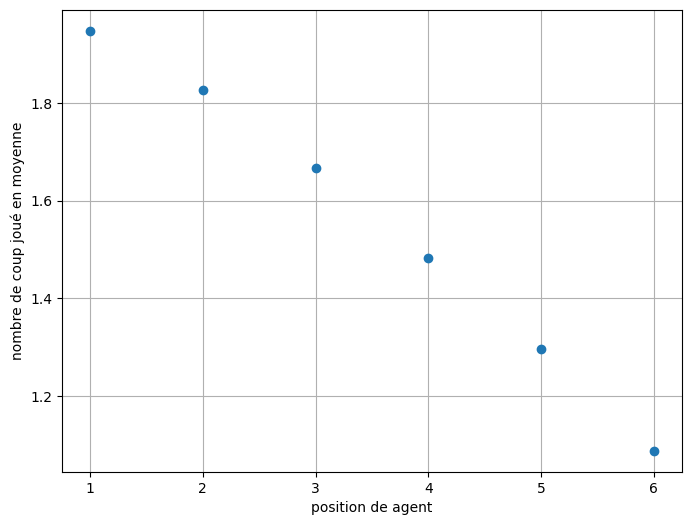

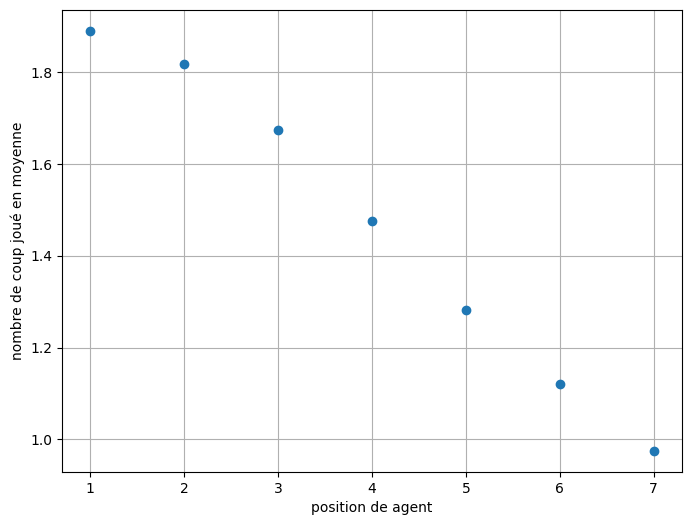

In [ ]:
def afficher_graphique(dictionnaire):
    # Extraire les clés et les valeurs du dictionnaire
    cles = list(dictionnaire.keys())
    valeurs = list(dictionnaire.values())
    
    # Créer le graphique
    plt.figure(figsize=(8, 6))
    plt.plot(cles, valeurs, marker='o', linestyle='')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel('Agent Position')
    plt.ylabel('Average Played Args')
    plt.title('')
    
    # Afficher le graphique
    plt.grid(True)
    plt.show()

print(sommeCSV(liste_of_df))
for i in range(3,9):
    afficher_graphique(sommeCSV(liste_of_df)[i])